### Import required packages

In [12]:
# import required packages
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for enhanced data visualization
import warnings  # to suppress unnecessary warnings

# Suppress warnings to enhance code readability
warnings.filterwarnings("ignore")

### Load the Dataset

In [13]:
# reads 'ds5.xls' as a pandas dataframe
df = pd.read_excel("../data/DS5.xls", engine="xlrd")

# displays the top 5 rows of the dataframe
df.head()

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


### Handling Missing Values

In [14]:
# counting null values in each column of the dataframe
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64

### Summary Statistics

In [15]:
# gives summary stats for each field in the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,50.0,717.96,293.938766,341.0,497.00,654.5,820.50,1740.0
X2,50.0,616.18,573.739175,29.0,230.75,454.0,822.50,3545.0
X3,50.0,37.76,13.820364,16.0,30.00,34.5,42.25,86.0
X4,50.0,58.80,9.965246,42.0,49.00,59.0,67.00,81.0
X5,50.0,15.40,6.023762,4.0,11.00,14.0,19.00,34.0
X6,50.0,29.90,14.801062,7.0,21.25,25.0,34.25,81.0
X7,50.0,13.82,5.157479,8.0,11.00,12.0,15.75,36.0


### Outliers Removal

In [16]:
# calculate z-scores for each element in the dataFrame
# define a threshold for identifying outliers (e.g., z-score > 3 for extreme outliers)
np.where(df.apply(lambda x: (x - x.mean()) / x.std()) > 3)

(array([11, 11, 17, 40, 40, 40, 42, 48]), array([5, 6, 5, 0, 1, 2, 4, 2]))

In [17]:
# remove rows with outliers based on the threshold
df.drop(np.where(df.apply(lambda x: (x - x.mean()) / x.std()) > 3)[0], inplace=True)

### Data Normalization

In [18]:
# normalize each column in the DataFrame 'df' by subtracting the mean and dividing by the standard deviation.
df = df.apply(lambda x: (x - x.mean()) / x.std())

### Data Visualization

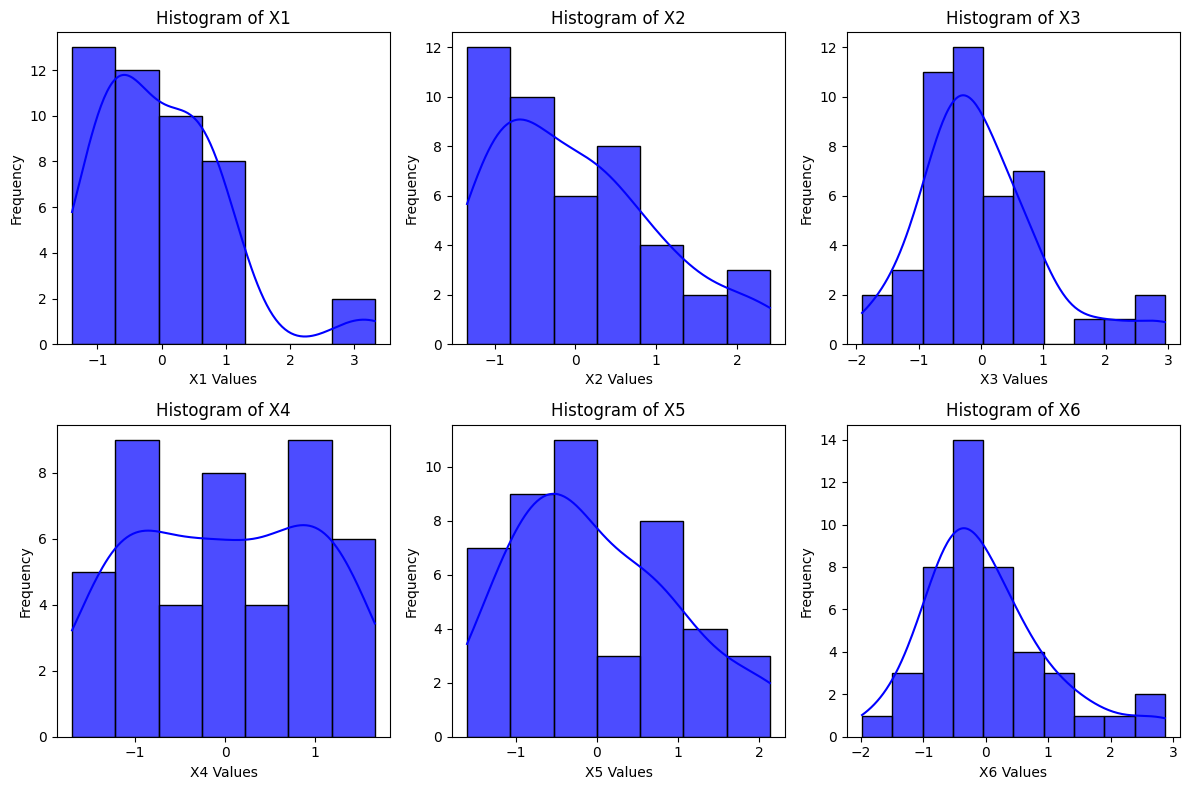

In [19]:
# create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# plot a histogram for the 'X1' column
sns.histplot(df["X1"], color="blue", alpha=0.7, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Histogram of X1")
axes[0, 0].set_xlabel("X1 Values")
axes[0, 0].set_ylabel("Frequency")

# plot a histogram for the 'X2' column
sns.histplot(df["X2"], color="blue", alpha=0.7, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Histogram of X2")
axes[0, 1].set_xlabel("X2 Values")
axes[0, 1].set_ylabel("Frequency")

# plot a histogram for the 'X3' column
sns.histplot(df["X3"], color="blue", alpha=0.7, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Histogram of X3")
axes[0, 2].set_xlabel("X3 Values")
axes[0, 2].set_ylabel("Frequency")

# plot a histogram for the 'X4' column
sns.histplot(df["X4"], color="blue", alpha=0.7, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Histogram of X4")
axes[1, 0].set_xlabel("X4 Values")
axes[1, 0].set_ylabel("Frequency")

# plot a histogram for the 'X5' column
sns.histplot(df["X5"], color="blue", alpha=0.7, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Histogram of X5")
axes[1, 1].set_xlabel("X5 Values")
axes[1, 1].set_ylabel("Frequency")

# plot a histogram for the 'X6' column
sns.histplot(df["X6"], color="blue", alpha=0.7, kde=True, ax=axes[1, 2])
axes[1, 2].set_title("Histogram of X6")
axes[1, 2].set_xlabel("X6 Values")
axes[1, 2].set_ylabel("Frequency")

# ensure proper spacing between subplots
plt.tight_layout()

# show the plot
plt.show()

### Model Building

In [20]:
def multiple_linear_regression(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    """
    Perform multiple linear regression to calculate beta coefficients.

    Args:
        X (np.ndarray): The predictor variables matrix with shape (n_samples, n_features).
        Y (np.ndarray): The target variable vector with shape (n_samples,).

    Returns:
        np.ndarray: The beta coefficients, including the intercept (b0), with shape (n_features + 1,).
    """
    X = np.column_stack((np.ones(len(X)), X))
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    return beta


def mse(y: pd.Series, y_pred: np.ndarray) -> float:
    """
    Calculate the Mean Squared Error (MSE) between the actual and predicted values for multiple linear regression.

    Args:
        y (pd.Series): The actual target values.
        y_pred (np.ndarray): The predicted values.

    Returns:
        float: The MSE.
    """
    return ((y - y_pred) ** 2).mean()


def r_squared(y: pd.Series, y_pred: np.ndarray) -> float:
    """
    Calculate the R-squared (R2) score between the actual and predicted values for multiple linear regression.

    Args:
        y (pd.Series): The actual target values.
        y_pred (np.ndarray): The predicted values.

    Returns:
        float: The R2 score.
    """
    SS_res = ((y - y_pred) ** 2).sum()
    SS_tot = ((y - y.mean()) ** 2).sum()
    return 1 - (SS_res / SS_tot)

In [21]:
from sklearn.model_selection import train_test_split

# split the data into X (predictor variables) and y (target variable)
X = df.drop(columns=["X1"])
Y = df["X1"]

# split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# fit the multiple linear regression model using training data
beta = multiple_linear_regression(X_train, Y_train)

# calculate predictions on the test data
X_test_stack = np.column_stack(
    (np.ones(len(X_test)), X_test)
)  # Add a column of ones for the intercept
Y_predicted = X_test_stack @ beta
print(f"Intercept (b0): {beta[0]}")
print(f"Slopes (b1, b2, ...): {beta[1:]}")
print(f"R2 score : {r_squared(Y_test, Y_predicted)}")
print(f"Mean Square Error : {mse(Y_test, Y_predicted)}")

Intercept (b0): -0.156456306100845
Slopes (b1, b2, ...): [ 0.60255005  0.04298347  0.18819295  0.15393709  0.18065737 -0.26353237]
R2 score : -0.07701862689226657
Mean Square Error : 2.0821696570432304


### Cross Verification

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# create a Linear Regression model
model = LinearRegression()

# fit the model on the training data
model.fit(X_train, Y_train)

# predict the target variable (Y) using the model on the test data
predicted_test = model.predict(X_test)
print(f"Intercept (b0): {model.intercept_}")
print(f"Slopes (b1, b2, ...): {model.coef_}")
print(f"R2 score (Test): {r2_score(Y_test, predicted_test)}")
print(f"Mean Squared Error (Test): {mean_squared_error(Y_test, predicted_test)}")

Intercept (b0): -0.156456306100845
Slopes (b1, b2, ...): [ 0.60255005  0.04298347  0.18819295  0.15393709  0.18065737 -0.26353237]
R2 score (Test): -0.0770186268922668
Mean Squared Error (Test): 2.082169657043231
